In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

spam_df = pd.read_csv('/content/drive/MyDrive/final_project/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
spam_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spam_df.info()
print("\nShape of SMS spam: ",spam_df.shape)
spam_df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Shape of SMS spam:  (5572, 2)


,count
label,
ham,4825
spam,747


Find and Drop Null, Duplicates

In [13]:
spam_df.isnull().sum()  # displaying null values

,0
label,0
message,0


In [14]:
spam_df.duplicated().sum() # displaying duplicates

np.int64(403)

In [15]:
spam_df = spam_df.drop_duplicates(keep='first')  # dropping duplicates
spam_df.duplicated().sum()

np.int64(0)

In [16]:
print(spam_df['label'].value_counts())

label
ham     4516
spam     653
Name: count, dtype: int64


Visualisation of target

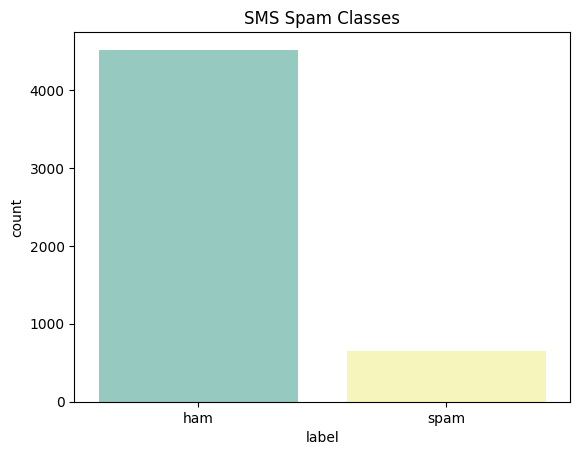

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=spam_df, palette='Set3')
plt.title('SMS Spam Classes')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

spam_labelEncode = LabelEncoder()
spam_df['label']= spam_labelEncode.fit_transform(spam_df['label'])
spam_df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


Noise Removal

In [19]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

def clean_text(text):
    text = text.lower()     # Changing Lowercase
    text = ''.join([char for char in text if char not in punctuations])  # Remove punctuation
    words = text.split()  # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

spam_df['clean_message'] = spam_df['message'].apply(clean_text)
spam_df.to_csv('sms_spam_cleaned.csv', index=False)  # save the preprocessed data
spam_df[['label', 'clean_message']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,clean_message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


Count Vectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

spam_X = spam_df.drop('label',axis=1)
spam_y = spam_df['label']

spam_tfvector = CountVectorizer(analyzer='word', max_features=1000)
spam_X = spam_tfvector.fit_transform(spam_df['clean_message'].values.astype('U')).toarray()
print("Count Vectorized shape of SMS spam: ",spam_X.shape)

Count Vectorized shape of SMS spam:  (5169, 1000)


In [21]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(spam_X[:1]) # printing only one row

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Splitting SMS Data

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spam_X, spam_y, random_state=12, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=12, test_size=0.5)
print("Training SMS Samples: ", X_train.shape)
print("Validation SMS Samples: ", X_val.shape)
print("Testing SMS Samples: ", X_test.shape)

Training SMS Samples:  (3101, 1000)
Validation SMS Samples:  (1034, 1000)
Testing SMS Samples:  (1034, 1000)



Logistic Regression

Selected Parameters for Logistic Regression:
 {'C': 0.2, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       912
           1       0.99      0.73      0.84       122

    accuracy                           0.97      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.97      0.96      1034



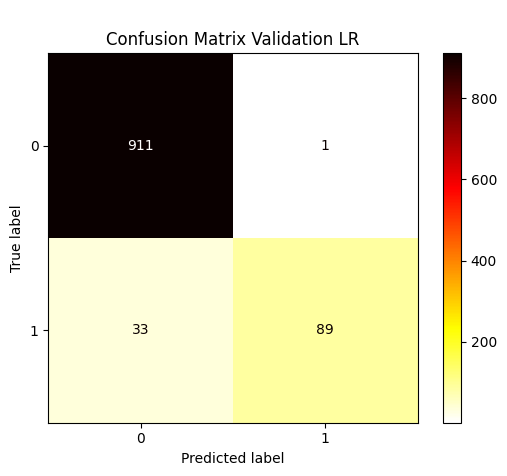

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       905
           1       0.97      0.75      0.85       129

    accuracy                           0.97      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.97      0.97      0.96      1034



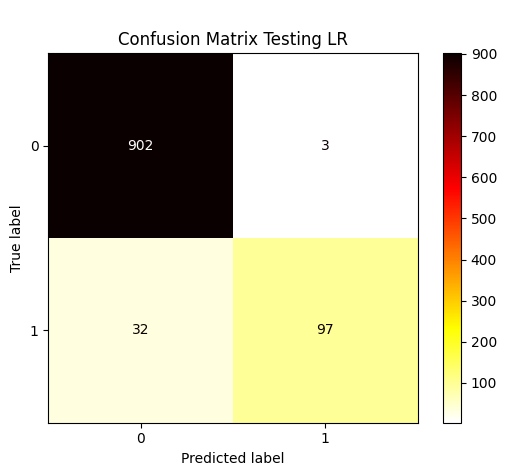

In [23]:
from sklearn.linear_model import LogisticRegression

parameters_tuning = {'penalty': ['l1', 'l2', 'elasticnet'],
                    'C': [0.1, 0.001, 0.2],
                    'solver': ['lbfgs','liblinear','sag']}

sms_model = LogisticRegression()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Logistic Regression:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation LR')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing LR')
plt.show()

Navie Bayes

Selected Parameters for Naive Bayes:
 {'priors': None, 'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       912
           1       0.39      0.93      0.54       122

    accuracy                           0.82      1034
   macro avg       0.69      0.86      0.72      1034
weighted avg       0.92      0.82      0.85      1034



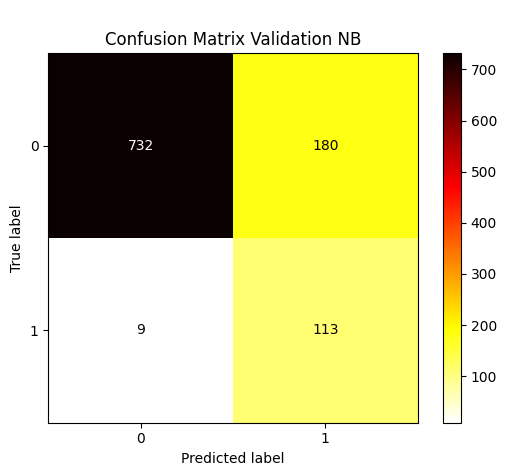

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       905
           1       0.43      0.91      0.59       129

    accuracy                           0.84      1034
   macro avg       0.71      0.87      0.74      1034
weighted avg       0.92      0.84      0.86      1034



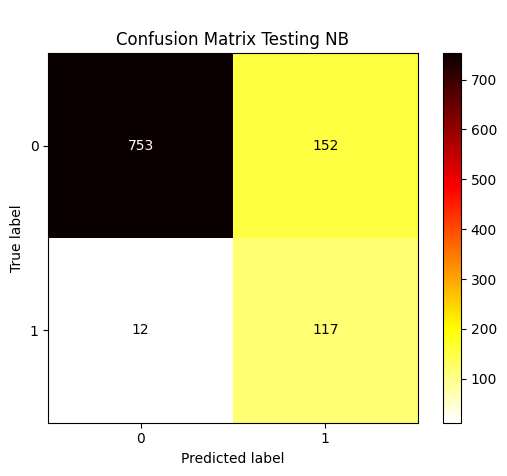

In [24]:
from sklearn.naive_bayes import GaussianNB

parameters_tuning = {'priors': [None, 0.1, 0.001, 0.05, 1.0],
                    'var_smoothing': [1e-09, 1e-06, 1e-05]}

sms_model = GaussianNB()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Naive Bayes:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation NB')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing NB')
plt.show()

Random Forest

Selected Parameters for Random Forest:
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       912
           1       0.89      0.78      0.83       122

    accuracy                           0.96      1034
   macro avg       0.93      0.88      0.90      1034
weighted avg       0.96      0.96      0.96      1034



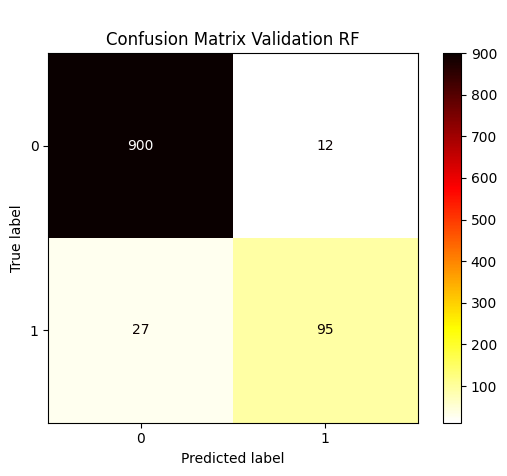

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       905
           1       0.93      0.71      0.81       129

    accuracy                           0.96      1034
   macro avg       0.94      0.85      0.89      1034
weighted avg       0.96      0.96      0.95      1034



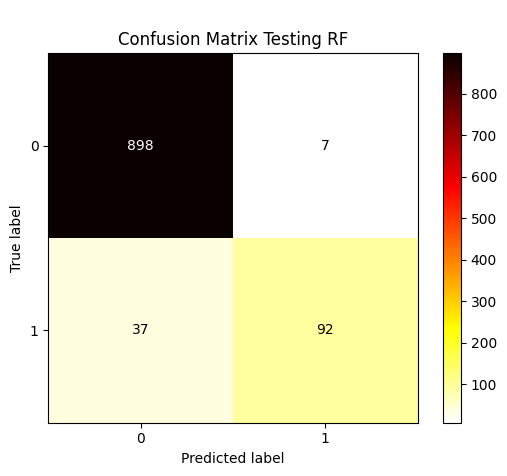

In [25]:
from sklearn.ensemble import RandomForestClassifier

parameters_tuning = {'n_estimators': [50, 10, 100, 200],
                    'criterion': ['gini', 'emtropy', 'log_loss'],
                    'max_depth': [3, 5, 10, 15],
                    'class_weight': ['balanced','balanced_subsample']}

sms_model = RandomForestClassifier()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Random Forest:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation RF')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing RF')
plt.show()

Support Vector Machines

Selected Parameters for Support Vector Machines:
 {'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       912
           1       0.95      0.85      0.90       122

    accuracy                           0.98      1034
   macro avg       0.96      0.92      0.94      1034
weighted avg       0.98      0.98      0.98      1034



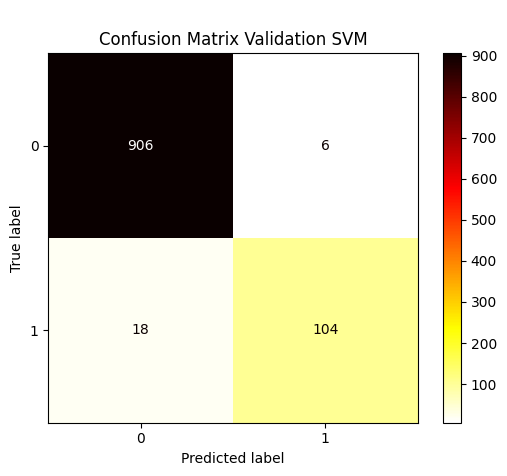

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       905
           1       0.99      0.84      0.91       129

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



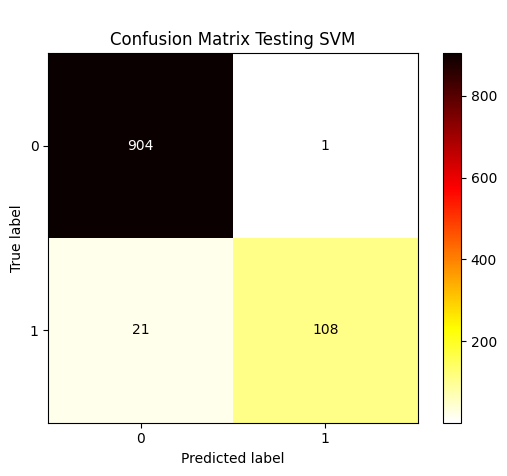

In [26]:
from sklearn.svm import SVC

parameters_tuning = {'gamma': ['scale', 'auto'],
                    'degree': [2, 5, 10, 15],
                    'kernel': ['rbf','poly','linear']}

sms_model = SVC()
sms_model = GridSearchCV(sms_model, parameters_tuning, cv=2)
sms_model.fit(X_train[:700], y_train[:700])
print("Selected Parameters for Support Vector Machines:\n", sms_model.best_params_)

## evaluation of training
sms_model = sms_model.best_estimator_
sms_model.fit(X_train, y_train)

## evaluation of validation
y_pred = sms_model.predict(X_val)
print(classification_report(y_val, y_pred))

cmatrix = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Validation SVM')
plt.show()

## evaluation of testing
y_pred = sms_model.predict(X_test)
print(classification_report(y_test, y_pred))

cmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[0, 1]).plot(cmap='hot_r')
plt.title('\nConfusion Matrix Testing SVM')
plt.show()